There are three kinds of naive Bayes classifiers implemented in scikit-learn, **`GaussianNB`**, **`BernoulliNB`** and **`MultinomialNB`**.
**`GaussianNB`** can be applied to any continuous data, while **`BernoulliNB`** assumes binary data and **`MultinomialNB`** assumes count data (that is each feature represents an integer count of something, like how often a word appears in a sentence). **`BernoulliNB`** and **`MultinomialNB`** are mostly used in text data classification,

### Gaussian NB

In [3]:
# a complete example of Supervised learning: Iris classifcation

import seaborn as sns
iris = sns.load_dataset('iris')
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict 

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.97368421052631582

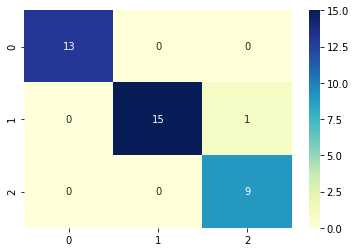

In [4]:
% matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
comat = confusion_matrix(ytest, y_model)
sns.heatmap(comat, annot = True, fmt='d', cbar = True, cmap = 'YlGnBu')

### Naive Bayes Classification for Handwritten Digits Dataset

In [5]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [6]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [7]:
digits.images[:2]

array([[[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
        [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
        [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
        [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
        [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
        [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
        [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
        [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]],

       [[  0.,   0.,   0.,  12.,  13.,   5.,   0.,   0.],
        [  0.,   0.,   0.,  11.,  16.,   9.,   0.,   0.],
        [  0.,   0.,   3.,  15.,  16.,   6.,   0.,   0.],
        [  0.,   7.,  15.,  16.,  16.,   2.,   0.,   0.],
        [  0.,   0.,   1.,  16.,  16.,   3.,   0.,   0.],
        [  0.,   0.,   1.,  16.,  16.,   6.,   0.,   0.],
        [  0.,   0.,   1.,  16.,  16.,   6.,   0.,   0.],
        [  0.,   0.,   0.,  11.,  16.,  10.,   0.,   0.]]])

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state=1)

model = GaussianNB()
model.fit(Xtrain, ytrain)
y_predict = model.predict(Xtest)

In [9]:
model.class_count_, model.class_prior_, model.classes_

(array([ 125.,  140.,  136.,  131.,  134.,  143.,  138.,  131.,  137.,  132.]),
 array([ 0.09279881,  0.10393467,  0.10096511,  0.09725316,  0.09948033,
         0.10616184,  0.10244989,  0.09725316,  0.1017075 ,  0.09799555]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [10]:
print(list(zip(ytest[:15],y_predict[:15])))

[(1, 1), (5, 5), (0, 0), (7, 7), (1, 1), (0, 0), (6, 6), (1, 1), (5, 5), (4, 4), (9, 9), (2, 8), (7, 7), (8, 8), (4, 4)]


In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predict,ytest)

0.85333333333333339

In [13]:
model.score(Xtest, ytest), model.score(Xtrain, ytrain)

(0.85333333333333339, 0.87379361544172229)

In [14]:
n = 0
for i,j in zip(ytest, y_predict):
    if i != j:
        n = n+1
print(n)  

66


In [15]:
(450-66)/450

0.8533333333333334

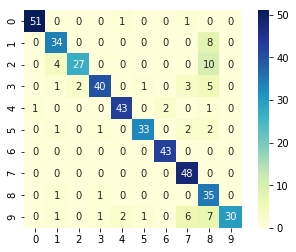

In [16]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_predict)
sns.heatmap(mat,square=True, annot=True, fmt='d', cmap = 'YlGnBu',cbar=True)

Above heatmap nicely illustrates the results of classification. The diagonal blocks (shown in dark colors) represents perfectly matched instances. All other blocks show the degree of confusion. For example, there has been one instance where 1 has been wrongly classified as 9. Similarily, 8 has been wrongly classified as 2 in 10 numbers of instances.

### Multinomial NB

In [2]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [3]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [4]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [6]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

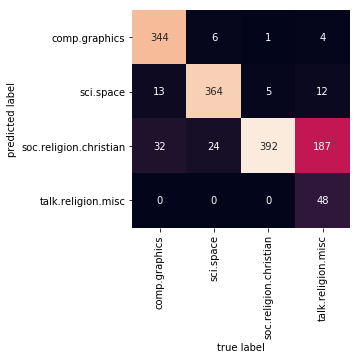

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');